In [1]:
import pandas as pd
import sqlite3
import plotly.graph_objects as go
import plotly.express as px
from pprint import pprint
import warnings
warnings.simplefilter(action="ignore")

In [2]:
connect = sqlite3.connect("stock_analysis.db")

# cursor object 
cursor = connect.cursor()

# Get a list of tables

In [3]:
query = "SELECT name FROM sqlite_master WHERE type='table'"
tables = pd.DataFrame(cursor.execute(query), columns=["stock_analysis_tables"])
tables

stock_analysis_tables
0                  stock
1            Apple_Price
2           Apple_Volume
3           Google_Price
4          Google_Volume
5        Microsoft_Price
6       Microsoft_Volume
7            Intel_Price
8           Intel_Volume
9           Oracle_Price
10         Oracle_Volume

# Create a function to work in each table

In [4]:
def Database_to_DataFrame(table_name):
    query = f"Select * from {table_name}"
    value = connect.execute(query)
    query = f"""SELECT name FROM PRAGMA_TABLE_INFO('{table_name}')"""
    column = connect.execute(query)
    clean_column=[]
    for item in list(column):
        clean_column.append(item[0])
    temp = pd.DataFrame(value, columns = clean_column)
    temp["Date"] = pd.to_datetime(temp["Date"])
    temp.set_index("Date", inplace = True)

    return temp

# Function for Scatter Bubble

- The bigger the circle/color, would mean the bigger % change
- The negative numbers indicate that we are losing money and in that scenario the color shifts/ becomes darker.

In [5]:
def scatter_bubble(df):
    temp = df.dropna()
    fig = px.scatter(
        temp, 
        x = temp.index, 
        y = "Percentage_change",
        size = temp["Percentage_change"].abs(),
        color = temp["Percentage_change"])
    
    return fig

# Function for Candle Plot

In [6]:
def candle_plot(candle, title="candle_plot_for_stock"):
    fig = go.Figure(
        data = [go.Candlestick(
            x = candle.index,
            open = candle["Open"],
            close = candle["Close"], 
            high = candle["High"], 
            low = candle["Low"], 
            increasing_line_color = "green", 
            decreasing_line_color = "red"
        )])
    fig.update_layout(title = title)
    
    return fig

In [7]:
Apple_df = Database_to_DataFrame("Apple_Price")
Apple_df.head()

Stock_id    Open    High     Low   Close  Month  Normalization  \
Date                                                                        
2023-01-03     AAPL  130.28  130.90  124.17  125.07      1         1.0000   
2023-01-04     AAPL  126.89  128.66  125.08  126.36      1         1.0103   
2023-01-05     AAPL  127.13  127.77  124.76  125.02      1         0.9996   
2023-01-06     AAPL  126.01  130.29  124.89  129.62      1         1.0364   
2023-01-09     AAPL  130.47  133.41  129.89  130.15      1         1.0406   

            Percentage_change  Accumulation  
Date                                         
2023-01-03                NaN           NaN  
2023-01-04             0.0103        1.0103  
2023-01-05            -0.0106        0.9996  
2023-01-06             0.0368        1.0364  
2023-01-09             0.0041        1.0406

In [8]:
Apple_volume = Database_to_DataFrame("Apple_Volume")
Apple_volume.head()

Stock_id   Adj Close     Volume
Date                                      
2023-01-03     AAPL  124.216293  112117500
2023-01-04     AAPL  125.497498   89113600
2023-01-05     AAPL  124.166641   80962700
2023-01-06     AAPL  128.735229   87754700
2023-01-09     AAPL  129.261627   70790800

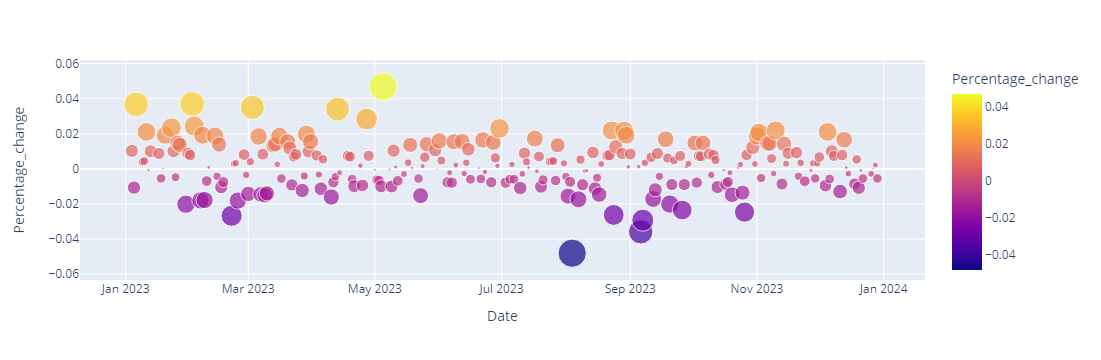

In [9]:
scatter_bubble(Apple_df).show()

In [10]:
Google_df = Database_to_DataFrame("Google_Price")
Google_df.head()

Stock_id   Open   High    Low  Close  Month  Normalization  \
Date                                                                    
2023-01-03    GOOGL  89.59  91.05  88.52  89.12      1         1.0000   
2023-01-04    GOOGL  90.35  90.65  87.27  88.08      1         0.9883   
2023-01-05    GOOGL  87.47  87.57  85.90  86.20      1         0.9672   
2023-01-06    GOOGL  86.79  87.69  84.86  87.34      1         0.9800   
2023-01-09    GOOGL  88.36  90.05  87.86  88.02      1         0.9877   

            Percentage_change  Accumulation  
Date                                         
2023-01-03                NaN           NaN  
2023-01-04            -0.0117        0.9883  
2023-01-05            -0.0213        0.9672  
2023-01-06             0.0132        0.9800  
2023-01-09             0.0078        0.9877

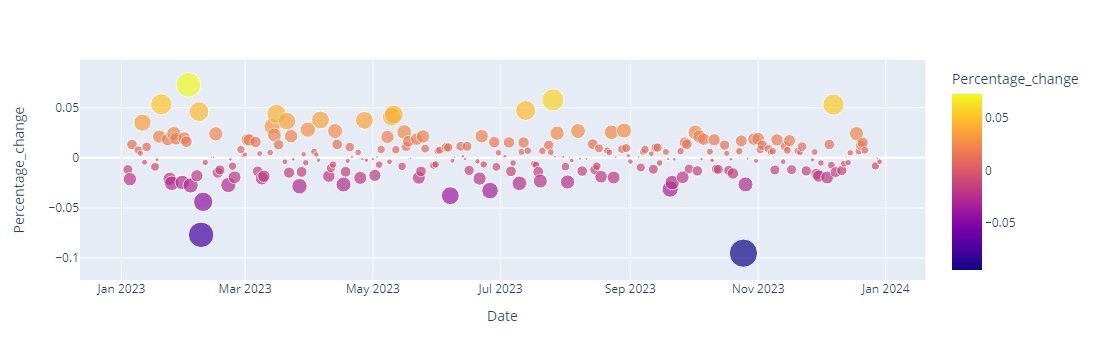

In [11]:
scatter_bubble(Google_df).show()

In [12]:
Intel_df = Database_to_DataFrame("Intel_Price")
Intel_df.head()

Stock_id   Open   High    Low  Close  Month  Normalization  \
Date                                                                    
2023-01-03     INTC  27.05  27.07  26.37  26.73      1         1.0000   
2023-01-04     INTC  27.41  27.92  27.16  27.68      1         1.0355   
2023-01-05     INTC  27.44  27.78  27.38  27.56      1         1.0311   
2023-01-06     INTC  27.93  28.83  27.38  28.73      1         1.0748   
2023-01-09     INTC  28.84  29.87  28.84  29.31      1         1.0965   

            Percentage_change  Accumulation  
Date                                         
2023-01-03                NaN           NaN  
2023-01-04             0.0355        1.0355  
2023-01-05            -0.0043        1.0311  
2023-01-06             0.0425        1.0748  
2023-01-09             0.0202        1.0965

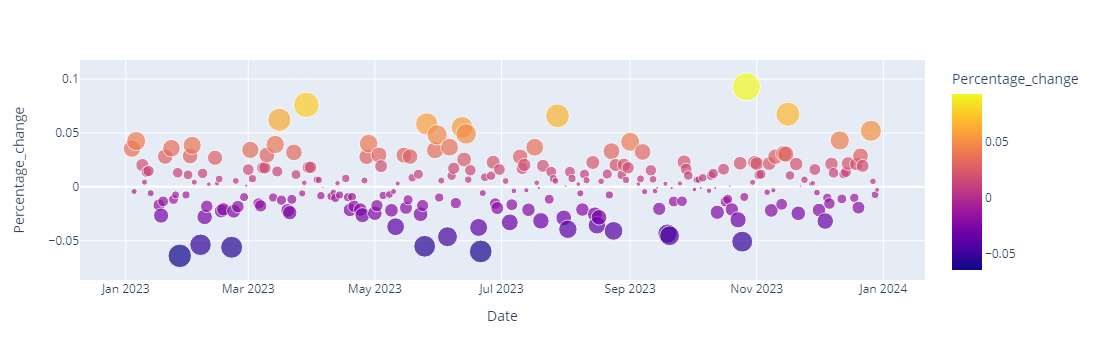

In [13]:
scatter_bubble(Intel_df).show()

In [14]:
Microsoft_df = Database_to_DataFrame("Microsoft_Price")
Microsoft_df.head()

Stock_id    Open    High     Low   Close  Month  Normalization  \
Date                                                                        
2023-01-03     MSFT  243.08  245.75  237.40  239.58      1         1.0000   
2023-01-04     MSFT  232.28  232.87  225.96  229.10      1         0.9563   
2023-01-05     MSFT  227.20  227.55  221.76  222.31      1         0.9279   
2023-01-06     MSFT  223.00  225.76  219.35  224.93      1         0.9389   
2023-01-09     MSFT  226.45  231.24  226.41  227.12      1         0.9480   

            Percentage_change  Accumulation  
Date                                         
2023-01-03                NaN           NaN  
2023-01-04            -0.0437        0.9563  
2023-01-05            -0.0296        0.9279  
2023-01-06             0.0118        0.9389  
2023-01-09             0.0097        0.9480

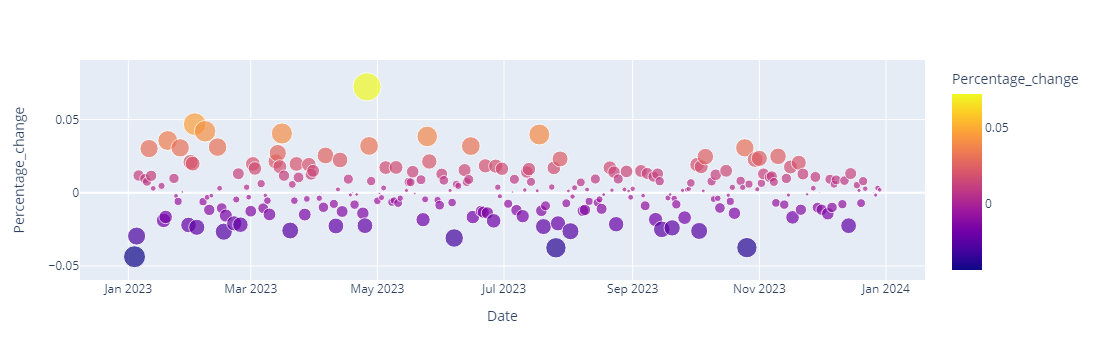

In [15]:
scatter_bubble(Microsoft_df).show()

In [16]:
Oracle_df = Database_to_DataFrame("Oracle_Price")
Oracle_df.head()

Stock_id   Open   High    Low  Close  Month  Normalization  \
Date                                                                    
2023-01-03     ORCL  82.47  83.84  82.26  83.72      1         1.0000   
2023-01-04     ORCL  84.20  85.17  83.64  84.48      1         1.0091   
2023-01-05     ORCL  85.00  85.40  83.22  84.31      1         1.0070   
2023-01-06     ORCL  84.74  86.34  83.82  85.66      1         1.0232   
2023-01-09     ORCL  86.84  87.59  86.16  86.42      1         1.0323   

            Percentage_change  Accumulation  
Date                                         
2023-01-03                NaN           NaN  
2023-01-04             0.0091        1.0091  
2023-01-05            -0.0020        1.0070  
2023-01-06             0.0160        1.0232  
2023-01-09             0.0089        1.0323

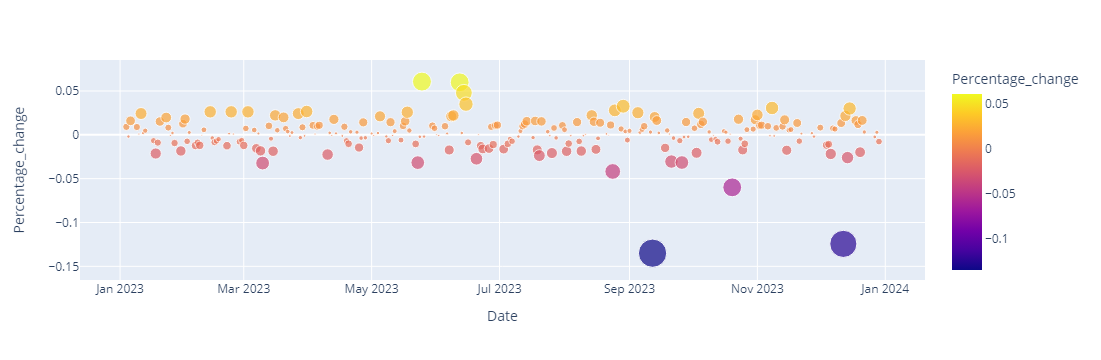

In [17]:
scatter_bubble(Oracle_df).show()

# Candle Plots

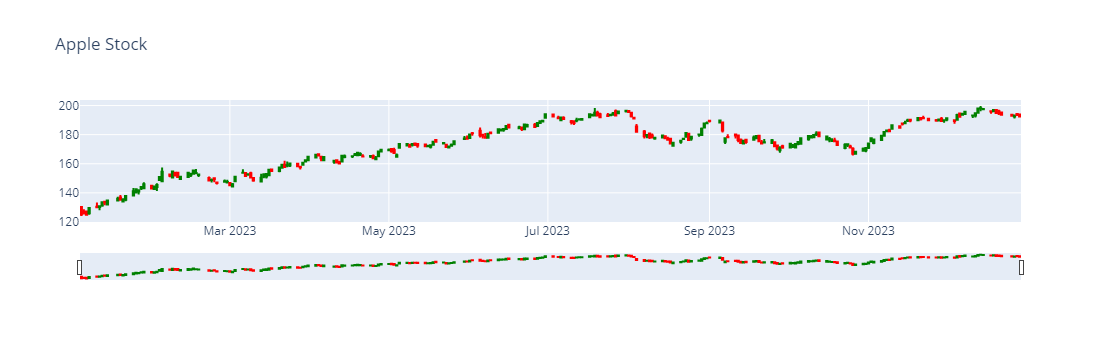

In [18]:
candle_plot(Apple_df,"Apple Stock").show()

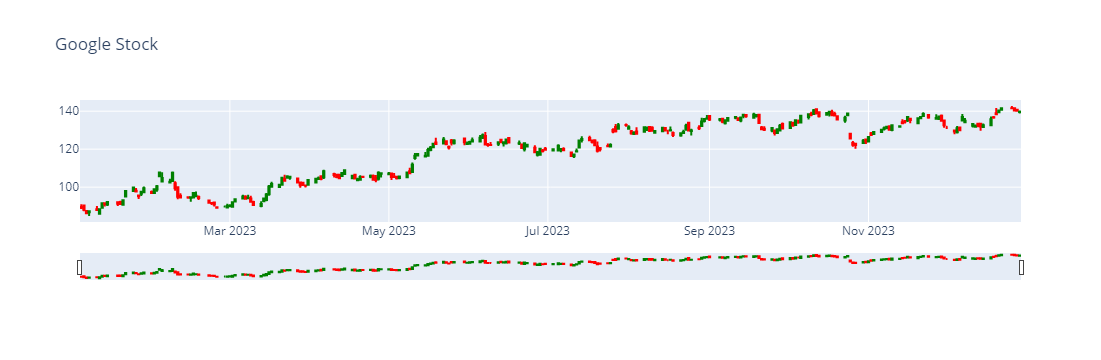

In [19]:
candle_plot(Google_df,"Google Stock").show()

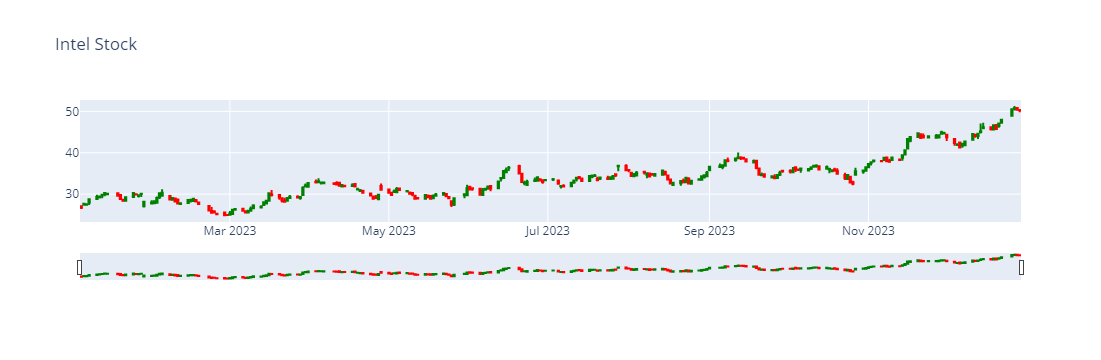

In [20]:
candle_plot(Intel_df,"Intel Stock").show()

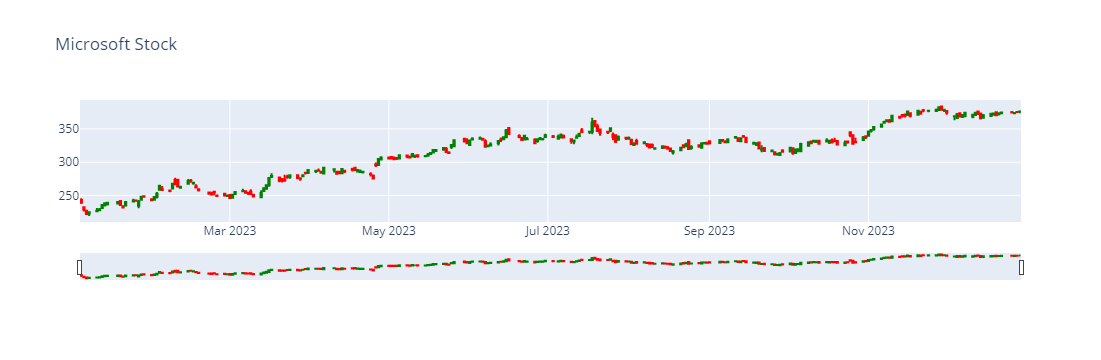

In [21]:
candle_plot(Microsoft_df,"Microsoft Stock").show()

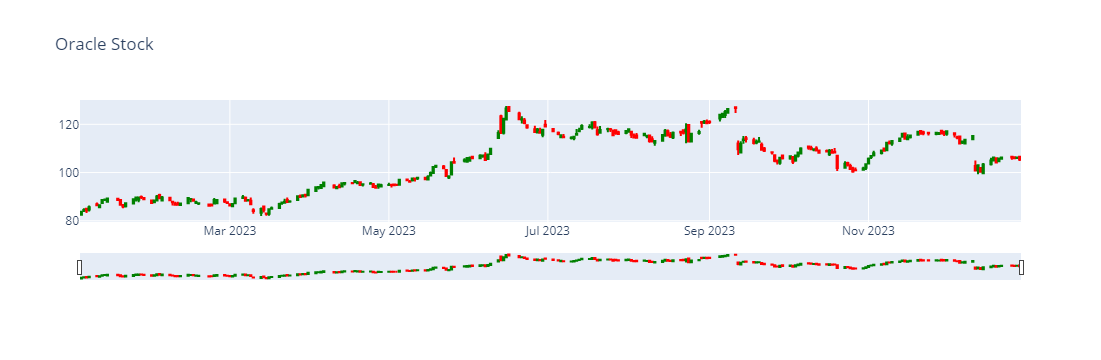

In [22]:
candle_plot(Oracle_df,"Oracle Stock").show()